# Aerofit : Descriptive Stats & Probability


This market research for AeroFit will be help identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. This study will investigate whether there are differences across the product with respect to customer characteristics.

### Importing Libraries, Loding of Aerofit dataset into Colab


In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Dataset/aerofit.csv'

data = pd.read_csv(path)

### 1. Defining Problem Statement and Analysing basic metrics



In [ ]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
data.shape

(180, 9)

In [ ]:
print(f"Number of rows: {data.shape[0]}\nNumber of columns:{data.shape[1]}")

Number of rows: 180
Number of columns:9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
# Finding the missing values in the data

data.isnull().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

### 2. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
# Distribution of the data according to Gender of the customers

data.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
# Top 5 age for which the customers are divided.

data.Age.value_counts(ascending= False)[:5]

25    25
23    18
24    12
26    12
28     9
Name: Age, dtype: int64

In [ ]:
# Number of products available in dataset.

data.Product.nunique()

3

In [ ]:
# Names of the products.
data.Product.unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
# Distribution of the data according to Products

data.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
# Distribution of the data according to Marital Status

data.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
# Distribution of the data according to Fitness Scale

data.Fitness.value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

Insights from the attributes:

1. We can  see here, that we do not have any null data.
2. We also have 3 unique products in the dataset.
3. The maximum age of the customer is 50 years where the minimum age of the same is 18 years. Also, the average age of the customer is 28.8 years.
4. The average income of the customers for the dataset is USD 53,719.58.  
5. Minimum income for the customers USD 29,562 and maximum income is of USD 104,581
6. For the data provided, 104 customers are male and 76 customers are female.
7. For all the 3 products, KP281 has 80 records, KP481 has 60 records, and KP781 has 40 records.
8. According to the Fitness scale, 31 customers have excellent shape where 97 customers have an average shape and only 26 customers below average to poor shape.  


### Univariate Analysis:

This analysis will provide us observations about all the columns like, age, income, gender, usage, fitness, miles, education of the data individually.

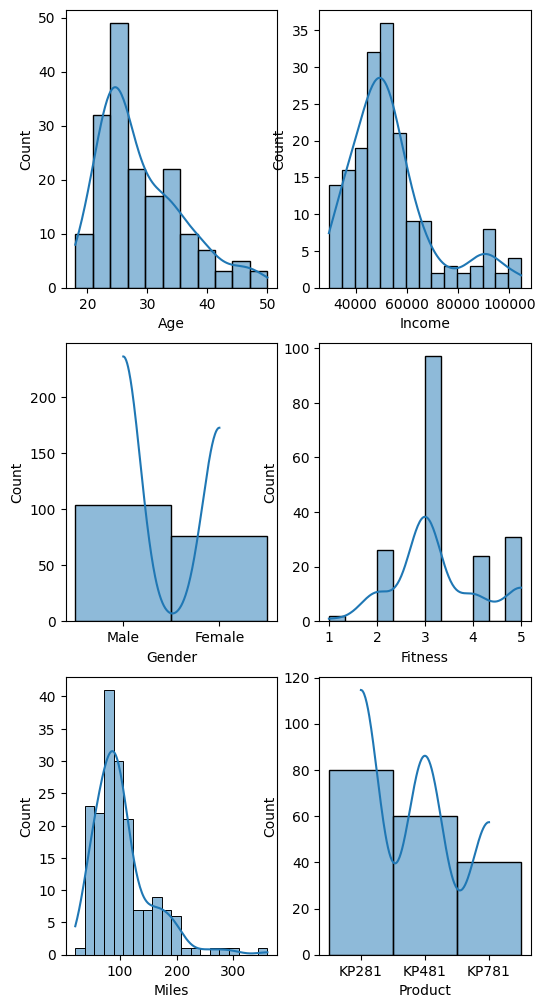

In [ ]:
# The data will show the Histplots for the Age, Income, Gender, Fitness, Miles, and Products. This helps understand the trends of the each attribute of the data.

fig, axis = plt.subplots(nrows= 3, ncols= 2, figsize= (6,5))
fig.subplots_adjust(top= 2.0)

sns.histplot(data= data, x='Age', ax= axis[0,0], kde= True)
plt.xlabel('Age', fontsize = 10)
sns.histplot(data= data, x='Income', ax= axis[0,1], kde= True)
plt.xlabel('Income', fontsize = 10)
sns.histplot(data= data, x='Gender', ax= axis[1,0], kde= True)
plt.xlabel('Gender', fontsize = 10)
sns.histplot(data= data, x='Fitness', ax= axis[1,1], kde= True)
plt.xlabel('Fitness', fontsize = 10)
sns.histplot(data= data, x='Miles', ax= axis[2,0], kde= True)
plt.xlabel('Miles', fontsize = 10)
sns.histplot(data= data, x='Product', ax= axis[2,1], kde= True)
plt.xlabel('Product', fontsize = 10)

plt.show()

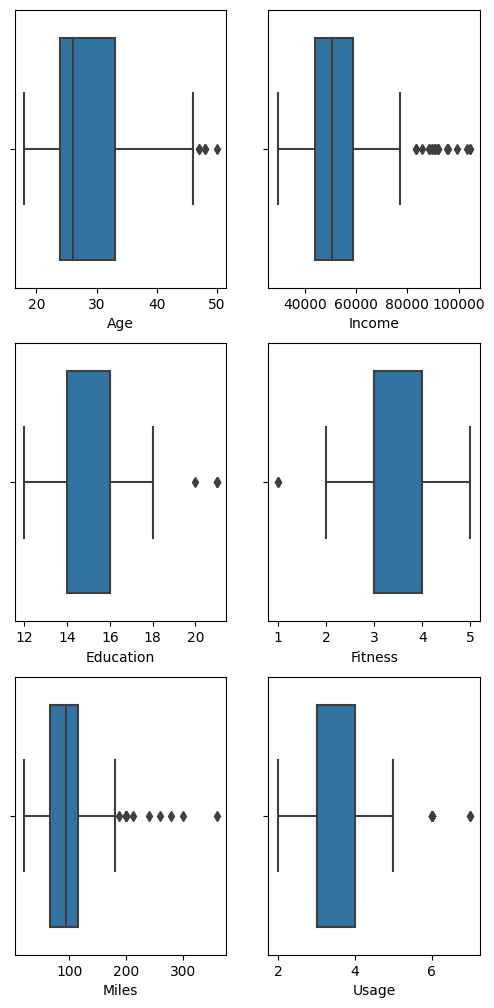

In [ ]:
# Here we can use the boxplot to check for the outliers and also to check the correlation between the attributes

fig, axis = plt.subplots(nrows= 3, ncols= 2, figsize= (6,5))
fig.subplots_adjust(top= 2.0)

sns.boxplot(data= data, x='Age', ax= axis[0,0], orient= 'h')
plt.xlabel('Age', fontsize = 10)
sns.boxplot(data= data, x='Income', ax= axis[0,1], orient= 'h')
plt.xlabel('Income', fontsize = 10)
sns.boxplot(data= data, x='Education', ax= axis[1,0], orient= 'h')
plt.xlabel('Education', fontsize = 10)
sns.boxplot(data= data, x='Fitness', ax= axis[1,1], orient= 'h')
plt.xlabel('Fitness', fontsize = 10)
sns.boxplot(data= data, x='Miles', ax= axis[2,0], orient= 'h')
plt.xlabel('Miles', fontsize = 10)
sns.boxplot(data= data, x='Usage', ax= axis[2,1], orient= 'h')
plt.xlabel('Usage', fontsize = 10)

plt.show()

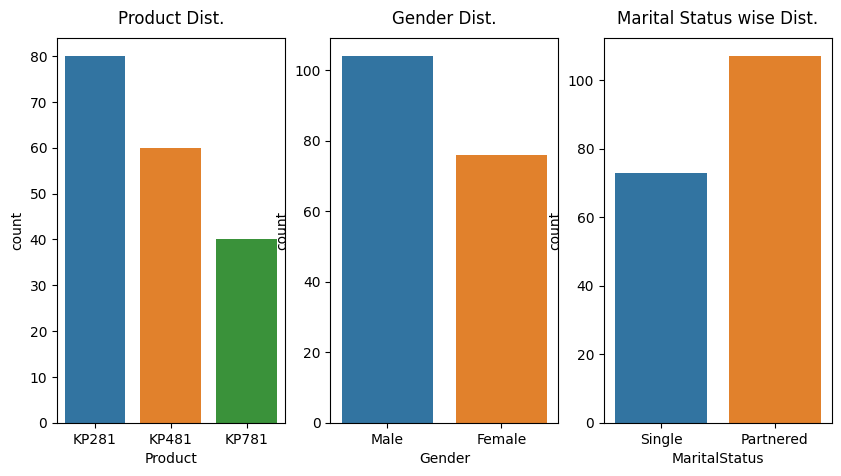

In [ ]:
# The distribution of Product, Gender and Marital Status using countplots

fig, axis = plt.subplots(nrows= 1, ncols= 3, figsize= (10,5))

sns.countplot(data= data, x='Product', ax= axis[0])
sns.countplot(data= data, x='Gender', ax= axis[1])
sns.countplot(data= data, x='MaritalStatus', ax= axis[2])

axis[0].set_title("Product Dist.", pad=10, fontsize=12)
axis[1].set_title("Gender Dist.", pad=10, fontsize=12)
axis[2].set_title("Marital Status wise Dist.", pad=10, fontsize=12)

plt.show()

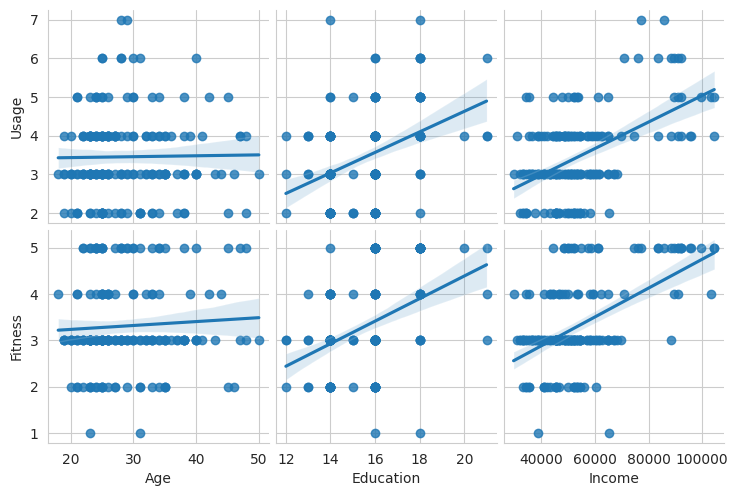

In [ ]:
# This is the pairplot which gives us an idea about a visual representation of the whole data and the co-relation between the any attributes with an Reg plots.

sns.pairplot(data,  x_vars= ['Age', 'Education', 'Income'], y_vars= ['Usage', 'Fitness'], kind= 'reg')
plt.show()

In [ ]:
df1 = data[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(data)*100

value
variable      value               
Gender        Female     42.222222
              Male       57.777778
MaritalStatus Partnered  59.444444
              Single     40.555556
Product       KP281      44.444444
              KP481      33.333333
              KP781      22.222222

Insights from the Univariate plots:
1. From the Age histplot, we can observe that the prime users of the products are in the age group of 20 to 35 years.
2. Also, the income of the customers are in the range of USD 40,000 to USD 60,000.
3. From the Product distribution subplots, we can observe that the KP81 is the most popular product among customers, followed by KP481.
4. Also, Gender distribution chart gives the male customers are much higher than female customers.
5. Also, the marital status plot provides us with the information than partnered customers are much likely to purchase the product than the single customers.
6. From the above table, we can say that around 44% customers have purchased KP281, around 33% have purchased KP481 and he rest 22% have purchased the KP781.
7. 59% customers who purchased any product is partenered.
8. 57% of the customers are male.

### Bivariate Analysis:

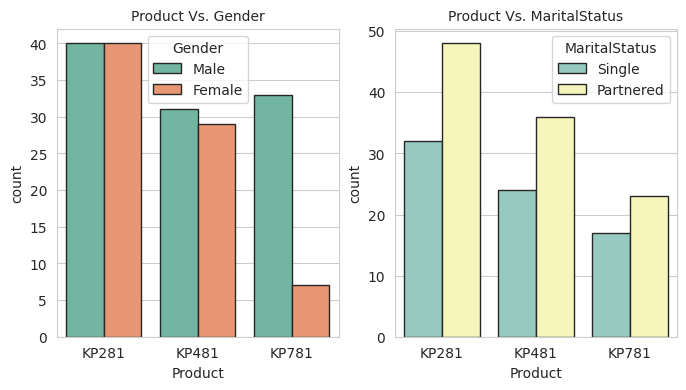

In [ ]:
# Countplot for Product vs Gender and Product vs. Marital Status
sns.set_style(style= 'whitegrid')
fig, axis = plt.subplots(nrows= 1, ncols= 2, figsize= (8,4))

sns.countplot(data= data, x= 'Product', hue= 'Gender', edgecolor= '0.15', palette= 'Set2', ax= axis[0])
sns.countplot(data= data, x= 'Product', hue= 'MaritalStatus', edgecolor= '0.15', palette= 'Set3', ax= axis[1])

axis[0].set_title('Product Vs. Gender', fontsize= 10)
axis[1].set_title('Product Vs. MaritalStatus', fontsize= 10)

plt.show()

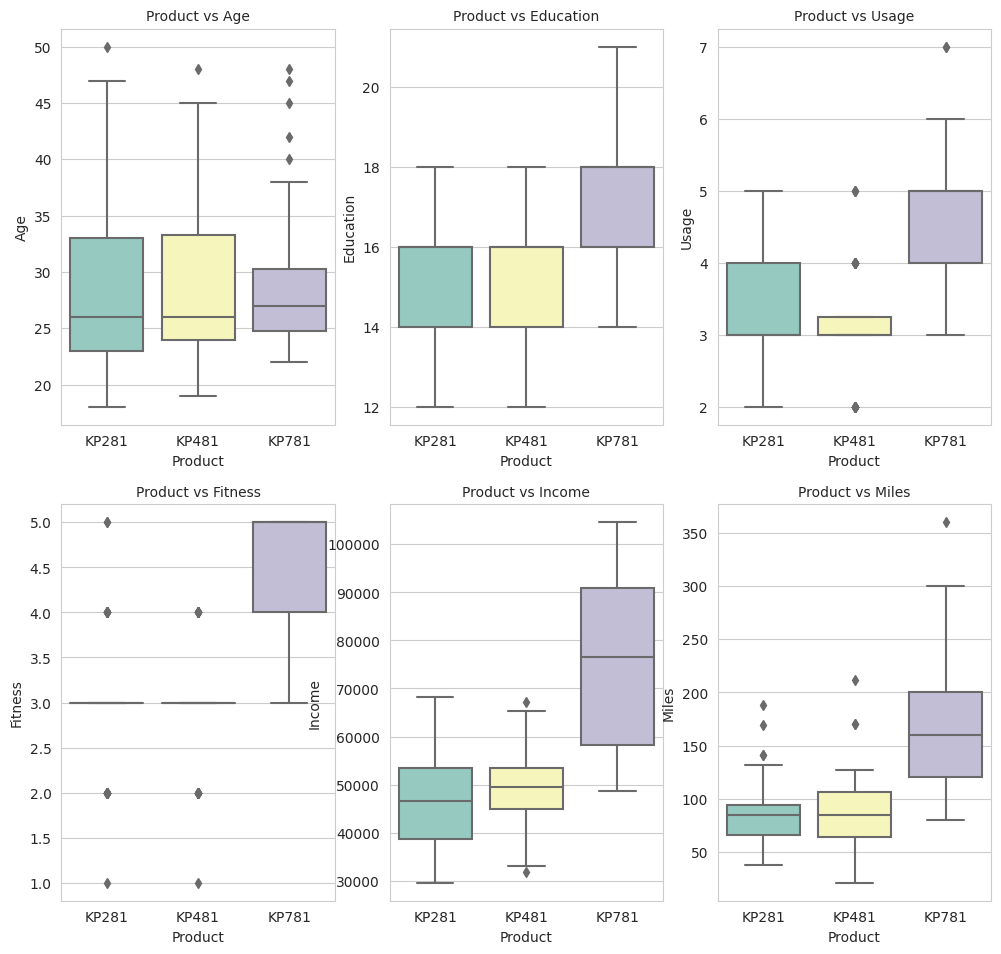

In [ ]:
# Boxplot for Product vs all the attributes

attr= ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

sns.set_style(style= 'whitegrid')
fig, axis = plt.subplots(nrows= 2, ncols= 3, figsize= (12,8))
fig.subplots_adjust(top= 1.2)

count= 0

for i in range(2):
  for j in range(3):
    sns.boxplot(data= data, x= 'Product', y= attr[count], palette= 'Set3', ax= axis[i,j])
    axis[i,j].set_title(f'Product vs {attr[count]}', fontsize= 10)
    count += 1

plt.show()

Insights from the bivariate plots:


1. From the first bivariate plot Product vs Gender, we can observe that for the purchase of products KP281 and KP481 is equal in number for male and female customers. Where male customers has largely purchased the KP781 than the female customers.

2. If we check for the Product vs Marital Status, as we observed before, here also the partnered customers have purchased more products than single customers.

3. From the boxplots, Median age of the customers purchasing KP281 and KP 481 are same. For all the purchased products, the customers are from the age group 20 to 40 years and in the age group of 25 to 30, customers are likely to purchase KP781.

4. From the Product vs Education plot, customers which are higher than 16 years in education are purchasing KP781 and the customers with education less than 16 years are purchasing KP281 and KP481.

5. Customers who use tradmills 3 to 4 times a week are purchasing KP281 while customers who are using trademills 4 to 5 times a week are purchasing KP781. KP481 customers are usually have 3 time a week usage.

6. Product vs Fitness plots suggests that customers with more than 4 fitness rating are purchasing KP781. Rest are purchasing KP281 and KP481.

7. From the Product vs Income plot we can observe, that customers with higher salaries (more than USD 60,000) are purchasing KP781 while customers with the salary range of USD 40,000 to USD 50,000 are purchasing KP281 and KP481 respectively.

8. The customers who runs 60 to 100 miles per week are purchasing the KP281 and KP481. The median run miles for these products are 90 miles per week. But the customers who runs more than 100 miles are purchasing KP781.  



### 4. Missing values and Outlier detection


In [ ]:
# Checking for missing data in the dataframe

data.isnull().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [ ]:
# Checking for the sum of missing values if any.

data.isnull().sum().sum()

0

Insight:

Here we can observe that we do not have any missing data in the dataframe.


------------------------------------------------------------------------

### Recommendations:



1. The data provided in the Aerofit dataset, clearely mentions few facts about the products KP281, KP481 and KP781.

2. For KP281, we can target the customers having any gender(male or female), customers having a partner, customers having age group is 20 to 33 years, who are having education between 14 to 16 years, customers having income ranging from USD 40 to 50,000, customers who runs 3 to 4 times per week for almost about 60 to 100 miles per week and who consider themselves having an average(3) customer rating.

3. For KP481,  we can target the customers having any gender(male or female), customers having a partner, customers having age group is 25 to 35 years,who are having education between 14 to 16 years, customers having income ranging from USD 45 to 55,000, customers who runs 3 times per week for almost about 60 to 110 miles per week and who consider themselves having an average(3) customer rating.

4. For KP781,  we can target the male customers, customers having a partner, customers having age group is 25 to 30 years,who are having education of more than 16 years, customers having income more than USD 60,000, customers who runs 4 to 5 times per week for almost about 130 to 200 miles per week and who consider themselves having highest (4 to 5) customer rating.


